#  <center>Case study on Pre-processing

Do the following on titanic dataset.
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load the dataset into python environment

In [4]:
df=pd.read_csv('titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The dataset has 12 columns related to passenger details, which are,
- **PassengerId:** Passenger’s unique ID
- **Survived:** Survival status of the passengers (0 = No; 1 = Yes)
- **Pclass:** Passenger class (1 = First; 2 = Second; 3 = Third)
- **Name:** Passenger’s name
- **Sex:** Sex of the Passenger
- **Age:** Age of the Passenger
- **SibSp:** Number of siblings/spouses aboard
- **ParCh:** Number of parents/children aboard
- **Ticket:** Ticket number
- **Fare:** Passenger fare
- **Cabin:** Cabin
- **Embarked:** Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

### 2. Make ‘PassengerId’ as the index column

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.set_index('PassengerId',inplace=True)

In [9]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. Check the basic details of the dataset

In [10]:
df1=df.reset_index()

In [11]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
df1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
df1.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [15]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
df1['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [18]:
df1.groupby('Survived')['Sex'].value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

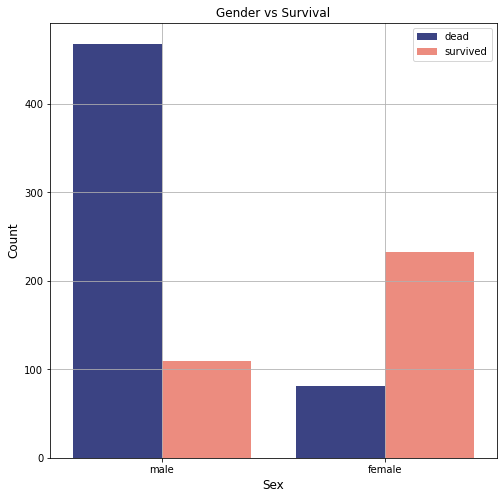

In [19]:
## gender vs survival graph
plt.figure(figsize=(8,8))
ax=sns.countplot(x='Sex',hue='Survived',data=df1,palette=['#2F3A8F','#FE7E6D'])
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['dead','survived'],bbox_to_anchor=(1,1))
plt.xlabel("Sex",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.title("Gender vs Survival")
plt.grid()

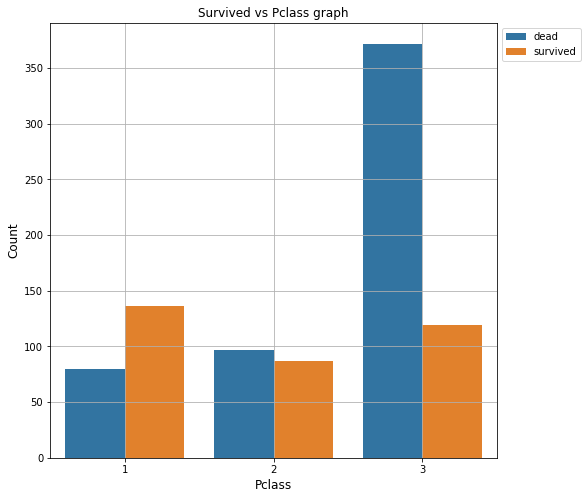

In [20]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x='Pclass',hue='Survived',data=df1)
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['dead','survived'],bbox_to_anchor=(1,1))
plt.xlabel("Pclass",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.title('Survived vs Pclass graph',fontsize=12)
plt.grid()

<AxesSubplot:>

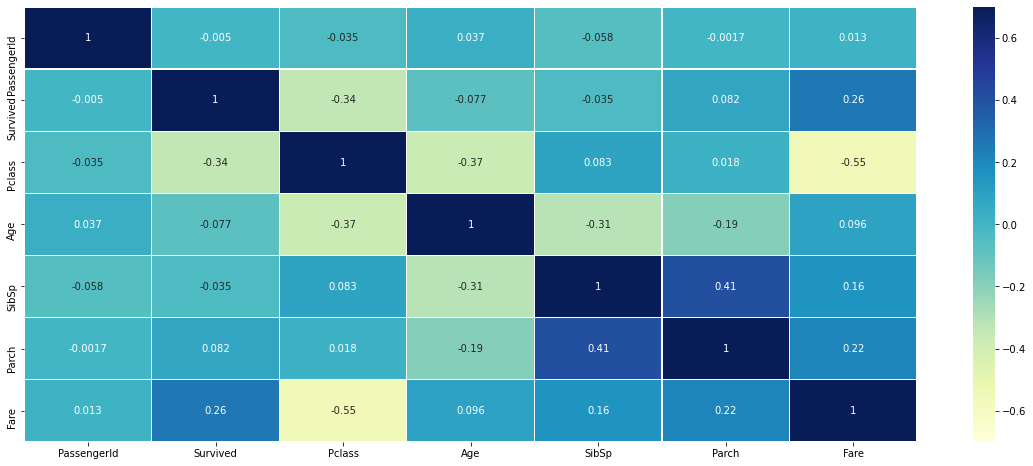

In [21]:
## corr matrix
corr=df1.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corr,vmin=-0.7,vmax=0.7,annot=True,linewidths=0.2,cmap='YlGnBu')

**Findings**
- There are total 891 rows and 12 columns
- Age shows only 714 (means missing), Embarked (2 missing) and Cabin have 77% null values.
- Out of the 342 survivors of the shipwreck, 233 of them were females. Only 81 females died.
- Out of the 577 male passengers, only 109 survived.
- Most Females were saved.
- Most of the dead passengers belong to the 3rd class where as least passengers from the 1st class died.
- Survived and fare are mild positively correalated.
- Survival and pclass are mild negatively correlated.

### 4. Fill in all the missing values present in all the columns in the dataset

In [48]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

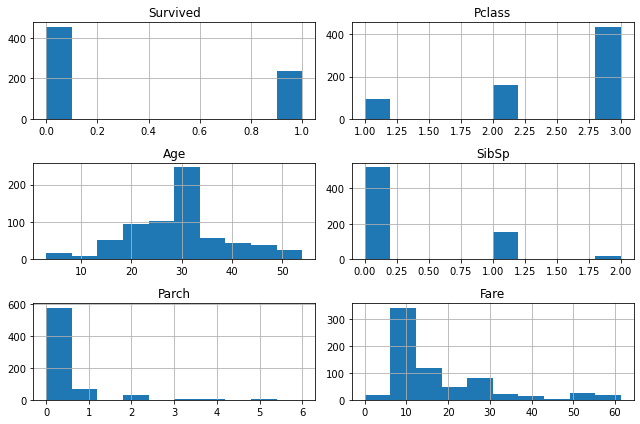

In [49]:
## freq distribution graph
freqgraph=df1.select_dtypes(include=['float','int64'])
freqgraph.hist(figsize=(9,6))
plt.tight_layout()
plt.show()


#### A. Handling Missing values in Age column

In [24]:
#To fill the missing values of age with mean(Age feature is normally distributed)
df1['Age'] =df1['Age'].fillna(df1['Age'].mean())

In [25]:
df1['Age'].isnull().sum()

0

#### B. Handling Missing values in embarked column

In [26]:
#to remove null values in embarked  column with their mode values 
df1['Embarked'] =df1['Embarked'].fillna(df1['Embarked'].mode()[0])

In [27]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

#### C. Handling Missing values in cabin column

In [28]:
## unique values in Cabin
df1['Cabin'].nunique()

147

In [29]:
## null count in Cabin
df1['Cabin'].isnull().sum()

687

In [30]:
print("Percentage of NULL value in Cabin :",(687/891)*100)

Percentage of NULL value in Cabin : 77.10437710437711


**We can either drop the column or assign or Null values to another variable**

In [31]:
# Convert all Null values to another group "Unknown"
df1['Cabin']=df1['Cabin'].fillna('Unknown')

In [32]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

- **All the missing values has been handled for the titanic dataset.**

**Dropping the irrelevant columns**

In [33]:
df1.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,Unknown,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,Unknown,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,Unknown,S


### 5. Check and handle outliers in at least 3 columns in the datase

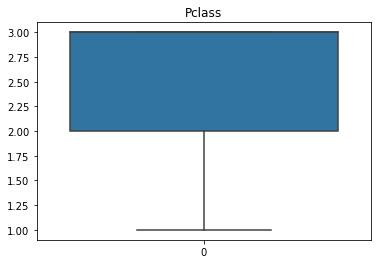

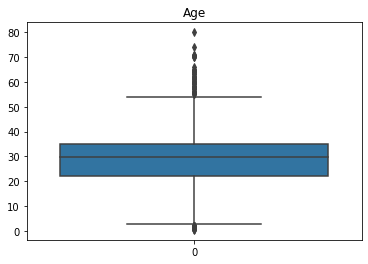

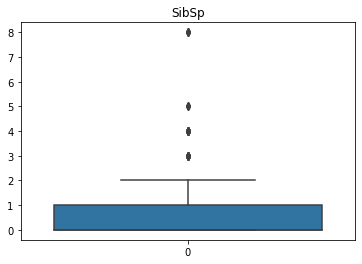

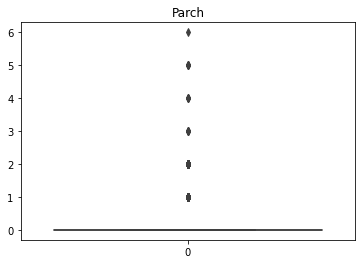

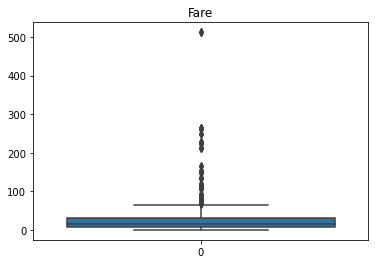

In [34]:
## checking outliers
for i in ['Pclass', 'Age',
       'SibSp','Parch','Fare']:
    plt.title(i)
    sns.boxplot(data=df1[i])
    plt.show()  


- **outliers present in 'Age','SibSp','Parch','Fare'.**

##### A. Handling Outliers with Age

In [35]:
df2=df1

In [36]:
## handling outliers in age
q1 = np.percentile(df2['Age'],25,interpolation='midpoint')
q3 = np.percentile(df2['Age'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df2['Age'][(df2['Age']<low_limit)|(df2['Age']>high_limit)].index
df2.drop(index,inplace=True)

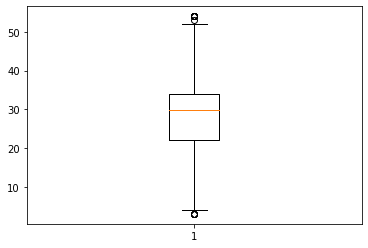

In [37]:
plt.boxplot(df2['Age'])
plt.show() 

#### B. Handling Outliers with Fare

In [38]:
# handling outliers in fare
q1 = np.percentile(df2['Fare'],25,interpolation='midpoint')
q3 = np.percentile(df2['Fare'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df2['Fare'][(df2['Fare']<low_limit)|(df2['Fare']>high_limit)].index
df2.drop(index,inplace=True)

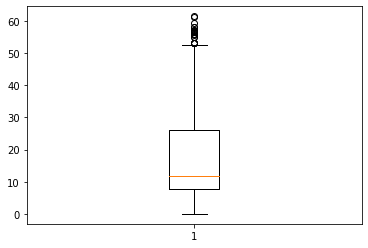

In [39]:
plt.boxplot(df2['Fare'])
plt.show() 

#### C. Handling Outliers with SibSp

In [40]:
## handling outliers in SibSp
q1 = np.percentile(df2['SibSp'],25,interpolation='midpoint')
q3 = np.percentile(df2['SibSp'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df2['SibSp'][(df2['SibSp']<low_limit)|(df2['SibSp']>high_limit)].index
df2.drop(index,inplace=True)

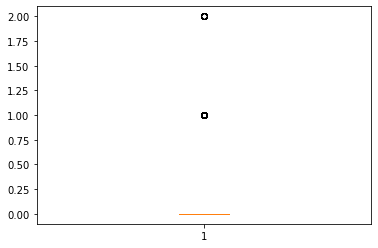

In [41]:
plt.boxplot(df2['SibSp'])
plt.show()

In [42]:
len(df2)

689

In [43]:
df2.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,0.341074,2.493469,29.100814,0.272859,0.269956,16.631246
std,0.474415,0.723586,9.542913,0.501020,0.754625,13.092563
min,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,23.000000,0.000000,0.000000,7.854200
50%,0.000000,3.000000,29.699118,0.000000,0.000000,10.500000
75%,1.000000,3.000000,33.000000,0.000000,0.000000,23.450000
max,1.000000,3.000000,54.000000,2.000000,6.000000,61.379200


In [44]:
## one hot encoding
df2 = pd.get_dummies(df2, columns=['Sex', 'Embarked'])

In [45]:
df2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,Unknown,0,1,0,0,1
2,1,3,26.000000,0,0,7.9250,Unknown,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,C123,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,Unknown,0,1,0,0,1
5,0,3,29.699118,0,0,8.4583,Unknown,0,1,0,1,0


In [46]:
## dropping irrelavant columns
df2.drop(['Cabin'],axis=1,inplace=True)

In [47]:
df2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
5,0,3,29.699118,0,0,8.4583,0,1,0,1,0


### 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [65]:
df_new=df2.drop('Survived',axis=1)

In [66]:
df_new.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,2.493469,29.100814,0.272859,0.269956,16.631246,0.312046,0.687954,0.150943,0.098694,0.750363
std,0.723586,9.542913,0.501020,0.754625,13.092563,0.463665,0.463665,0.358254,0.298467,0.433117
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.854200,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,29.699118,0.000000,0.000000,10.500000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,33.000000,0.000000,0.000000,23.450000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,54.000000,2.000000,6.000000,61.379200,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
from sklearn import preprocessing
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
df_new=min_max.fit_transform(df_new)

In [68]:
df_new=pd.DataFrame(df_new,columns=['Pclass', 'Age', 'SibSp','Parch','Fare','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S'])

In [69]:
df_new.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,689.000000,689.000000,689.00000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,0.746734,0.511781,0.13643,0.044993,0.270959,0.312046,0.687954,0.150943,0.098694,0.750363
std,0.361793,0.187116,0.25051,0.125771,0.213306,0.463665,0.463665,0.358254,0.298467,0.433117
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.392157,0.00000,0.000000,0.127962,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.523512,0.00000,0.000000,0.171068,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.588235,0.00000,0.000000,0.382051,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- **We can see that the distributions have been adjusted and that the minimum and maximum values for each variable are now a 0.0 and 1.0 respectively.**